In [3]:
import copy
import numpy as np
import pandas as pd
import anndata as an
import scanpy as sc

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


r-pillar                  1.8.1             r41hc72bb7e_1    conda-forge
r-pkgconfig               2.0.3             r41hc72bb7e_2    conda-forge
r-pkgload                 1.3.1             r41hc72bb7e_0    conda-forge
r-pkgmaker                0.32.2            r41hc72bb7e_1    conda-forge
r-plyr                    1.8.7             r41ha856d6a_1    conda-forge
r-praise                  1.0.0           r41hc72bb7e_1006    conda-forge
r-prettyunits             1.1.1             r41hc72bb7e_2    conda-forge
r-proc                    1.18.0            r41ha856d6a_1    conda-forge
r-processx                3.8.0             r41h6d2157b_0    conda-forge
r-prodlim                 2019.11.13        r41ha856d6a_2    conda-forge
r-progress                1.2.2             r41hc72bb7e_3    conda-forge
r-progressr               0.11.0            r41hc72bb7e_1    conda-forge
r-promises                1.2.0.1           r41ha856d6a_1    conda-forge
r-proxy                   0.4_27            r41h6

In [45]:
filename = "GSE72857_accession_formatted.csv"
adata = sc.read_csv(filename, first_column_names=True).T
adata

AnnData object with n_obs × n_vars = 10368 × 27297

In [46]:
count_depth = np.sum(adata.X, axis = 1)
print("count depth shape:{}".format(count_depth.shape))
print(count_depth)

count depth shape:(10368,)
[ 229. 2258.  156. ...   68.  245.   81.]


In [47]:
number_of_genes = np.sum(adata.X>0,axis=1)
print("number_of_genes shape:{}".format(number_of_genes.shape))
print(number_of_genes)

number_of_genes shape:(10368,)
[ 215 1393  148 ...   67  212   77]


Text(0, 0.5, 'unique genes')

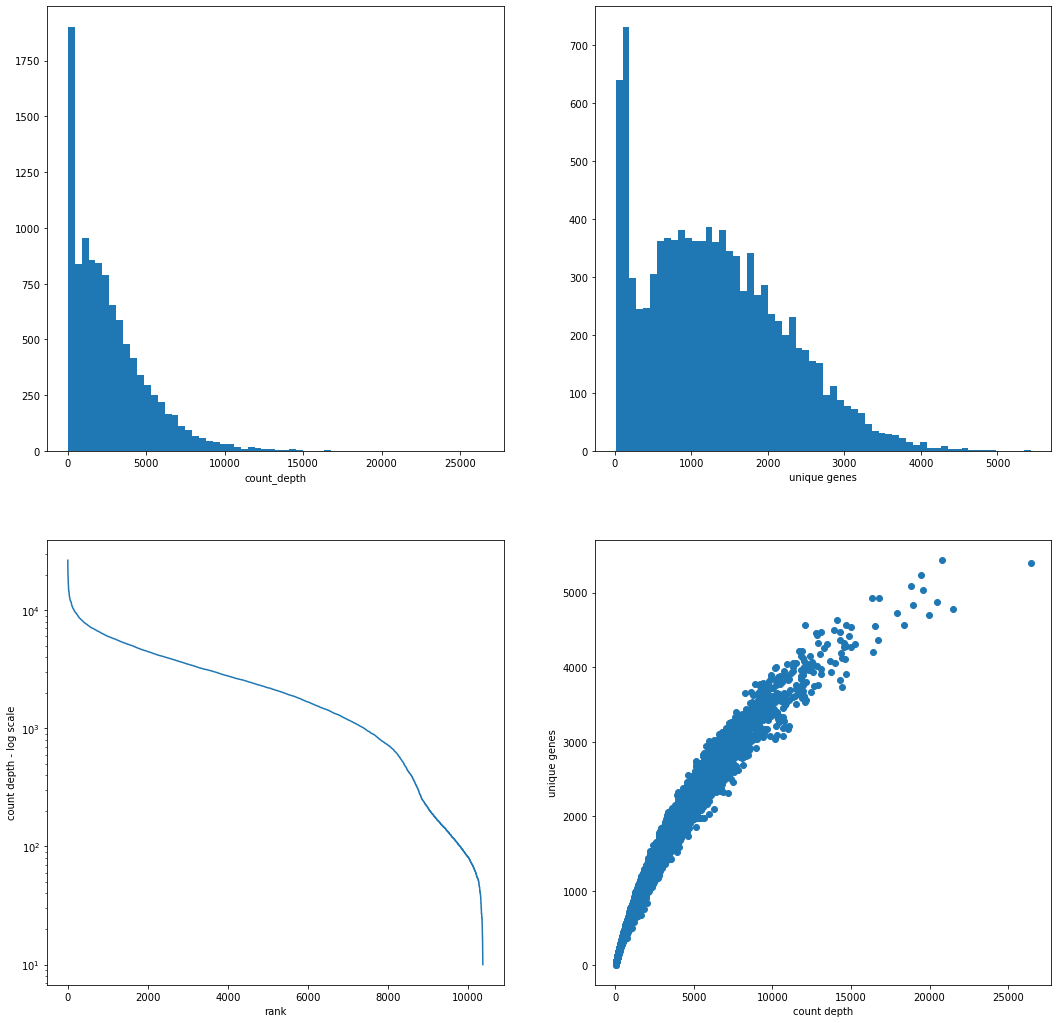

In [48]:
plt.rcParams["figure.figsize"] = [18,18]
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(count_depth,bins=60)
#axs[0,0].set_yscale("log")
axs[0,0].set_xlabel("count_depth")

axs[0,1].hist(number_of_genes,bins=60)
#axs[0,1].set_yscale("log")
axs[0,1].set_xlabel("unique genes")

axs[1,0].plot(range(len(count_depth)),sorted(count_depth,reverse=True))
axs[1,0].set_yscale("log")
axs[1,0].set_xlabel("rank")
axs[1,0].set_ylabel("count depth - log scale")

axs[1,1].scatter(count_depth,number_of_genes)
axs[1,1].set_xlabel("count depth")
axs[1,1].set_ylabel("unique genes")

hi :)


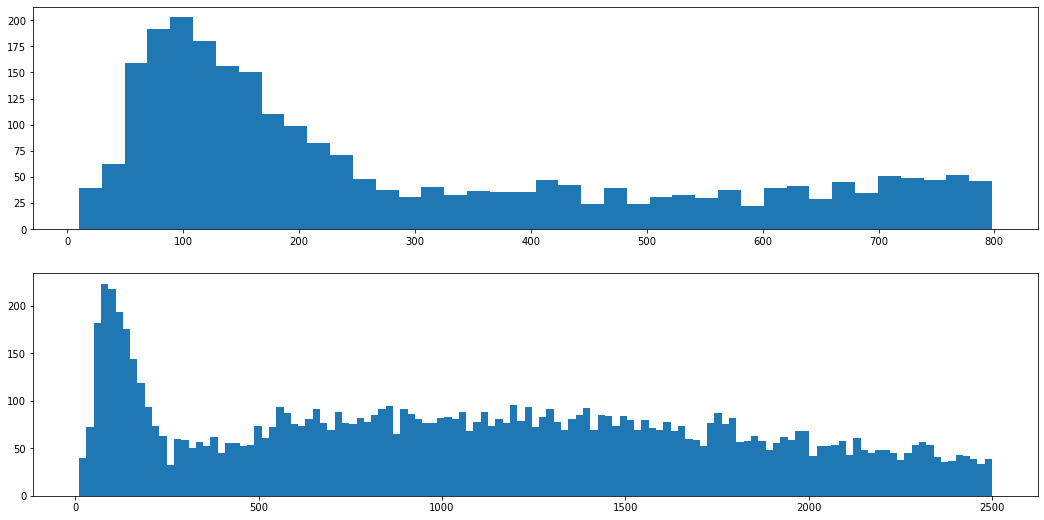

In [49]:
plt.rcParams["figure.figsize"] = [18,9]
fig2, axs2 = plt.subplots(2, 1)

mindepth = 1
maxdepth = 800
mingenes = 1
maxgenes = 2500

#axs2[0].hist(count_depth[np.where((count_depth <= maxdepth) & (count_depth >= mindepth))], bins=min([200,int(maxdepth/20)]),cumulative=True)
axs2[0].hist(count_depth[np.where((count_depth <= maxdepth) & (count_depth >= mindepth))], bins=min([200,int(maxdepth/20)]),cumulative=False)
#axs2[0].set_yscale("log")
#axs2[0].hist(count_depth[np.where((count_depth < maxdepth))], bins=21)

axs2[1].hist(number_of_genes[np.where((number_of_genes<=maxgenes) & (number_of_genes >= mingenes))],bins=min([200,int(maxgenes/20)]),cumulative=False)
#axs2[1].set_yscale("log")
#axs2[1].hist(number_of_genes[np.where((number_of_genes<maxgenes) )],bins=21)

print("hi :)")

I'll have to check how this dataset was collected, but it looks like these cells may already have been FACS sorted against some kind of live/dead stain prior to scRNA-seq, they are clean and missing populations with features characteristic of lysed cells


In [50]:
adata_filtered = copy.deepcopy(adata)
print(adata_filtered.X.shape)

sc.pp.filter_genes(adata_filtered, min_counts = 1)
print(adata_filtered.X.shape)

sc.pp.filter_cells(adata_filtered, min_counts = 300)
print(adata_filtered.X.shape)

sc.pp.filter_cells(adata_filtered, min_genes = 500)
print(adata_filtered.X.shape)

(10368, 27297)
(10368, 16162)
(8758, 16162)
(8100, 16162)
